In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
users = open('./../MovieLens/basic/users_basic_sample_section.csv').read().split('\n')

In [3]:
ratings = pd.read_csv("./../MovieLens/basic/ratings_basic_sample_section.csv")

In [4]:
userID = 232
all_ratings = np.arange(0,5.5,0.5).tolist()

In [5]:
user = ratings[ratings['userId'] == userID]

In [6]:
user.describe()

,userId,movieId,rating
count,862.0,862.000000,862.000000
mean,232.0,26817.124130,3.250580
std,0.0,24853.445949,0.760429
min,232.0,1.000000,0.500000
25%,232.0,4887.000000,3.000000
50%,232.0,8917.500000,3.000000
75%,232.0,49134.250000,4.000000
max,232.0,82459.000000,5.000000


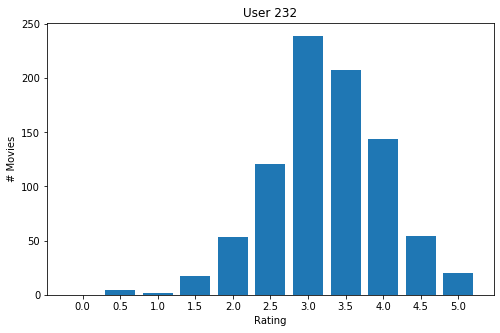

In [7]:
fig = plt.figure(figsize = (8,5))
ax = fig.gca()
freq = dict(Counter(user['rating']))
plt.bar(all_ratings, [freq[index] if index in freq else 0 for index in all_ratings], width=0.4)
plt.xlabel("Rating")
plt.ylabel("# Movies")
plt.title("User {}".format(userID))
plt.xticks(all_ratings)
plt.show()

In [4]:
group1 = [232,291,153,48,156]
group2 = [1, 480, 215, 94, 152, 555]
group3 = [435, 302, 300, 315, 290, 359, 346]
group4 = [365]
group5 = [3, 62, 506, 286, 262]
all_groups = [group1, group2, group3, group4, group5]
all_users = group1 + group2 + group3 + group4 + group5

In [5]:
all_groups

[[232, 291, 153, 48, 156],
 [1, 480, 215, 94, 152, 555],
 [435, 302, 300, 315, 290, 359, 346],
 [365],
 [3, 62, 506, 286, 262]]

In [45]:
movie_dfs = []

# movieID, mean rating, std rating, min rating, max rating, count by rating, count total users, which users from given list rated this movie
for i, group in enumerate(all_groups):
    print('Group {}'.format(i+1))
    movies = ratings[ratings['userId'].isin(group)]['movieId'].unique()
    new_df = {'movieId': movies.tolist(),
            'mean_rating': [],
            'std_rating': [],
            0.0: [],
            0.5: [],
            1.0: [],
            1.5: [],
            2.0: [],
            2.5: [],
            3.0: [],
            3.5: [],
            4.0: [],
            4.5: [],
            5.0: [],
            'count_users': [],
            'rated_by_group': [],
            'rated_by_all_groups': []}

    for movie in movies:
        movie_ratings = ratings[ratings['movieId']==movie]['rating']
        movie_users = ratings[ratings['movieId']==movie]['userId'].values
        new_df['mean_rating'].append(movie_ratings.mean())
        new_df['std_rating'].append(movie_ratings.std())
        new_df['count_users'].append(len(movie_ratings))

        freq = Counter(movie_ratings.values)
        for index in all_ratings:
            if index in freq:
                new_df[index].append(freq[index])
            else:
                new_df[index].append(0)
        new_df['rated_by_group'].append(', '.join(str(x) for x in list(filter(lambda x: x in movie_users, group))))
        new_df['rated_by_all_groups'].append(', '.join(str(x) for x in list(filter(lambda x: x in movie_users, all_users))))

    movie_dfs.append(pd.DataFrame.from_dict(new_df))

Group 1
Group 2
Group 3
Group 4
Group 5


In [43]:
movie_dfs[0].head()

,movieId,mean_rating,std_rating,0.0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,count_users,rated_by,rated_by_
0,48,3.078947,1.124219,0,1,3,1,4,1,12,3,9,2,2,38,"232, 48","232, 48, 435, 262"
1,168,3.171875,1.248285,0,1,0,3,5,2,8,2,4,1,6,32,48,"48, 480"
2,172,2.803571,0.975053,0,1,2,0,5,2,10,3,4,1,0,28,48,"48, 480, 555"
3,653,2.986111,0.890314,0,1,1,1,3,3,17,2,7,0,1,36,"232, 48","232, 48, 480, 286"
4,780,3.424107,0.982298,0,1,2,0,11,11,25,18,23,7,14,112,"232, 153, 48","232, 153, 48, 1, 480, 555, 302, 359"


In [47]:
for i, df in enumerate(movie_dfs):
    df.to_csv('group{}.csv'.format(i+1), index=False)

In [19]:
ratings.groupby(['movieId'], as_index=False).count().sort_values(['userId'], ascending=False)

,movieId,userId,rating
296,356,176,176
261,318,172,172
244,296,167,167
482,593,151,151
1806,2571,144,144
212,260,141,141
393,480,129,129
2059,2959,123,123
91,110,123,123
840,1196,118,118


In [7]:
movies = []
for i, group in enumerate(all_groups):
    movies.append(ratings[ratings['userId'].isin(group)]['movieId'].unique())

In [42]:
result = set(movies[0]).intersection(*movies)

In [43]:
len(result)

19